In [13]:
import s3fs
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import date as dt

## Difference in the Performance of the companies in the regimes of BJP and Congress 

### Narendra Modi's Tenure:
- Modi I (First Term): May 26, 2014 – May 26, 2019
- Modi II (Second Term): May 30, 2019 – May 2024
- Modi III (Third Term) (assuming BJP wins 2024 elections): Late May 2024 – Ongoing (to be confirmed post-elections)
### Manmohan Singh's Tenure:
- UPA I (Manmohan Singh's First Term): May 22, 2004 – May 22, 2009
- UPA II (Manmohan Singh's Second Term): May 22, 2009 – May 26, 2014

## Performing (II) Index Analysis


In [14]:
Index = ["^NSEI", "^NSEMDCP50"]#, "^CNXSC"]
Stock = {}

for index in Index:
    Stock[index] = yf.Ticker(index)

In [15]:
UPAI = {
    "start" : "2004-05-22",
    "end" : "2009-05-21",
    "PrimeMinister" : "Manmohan Singh",
    "Party" : "Indian National Congress",
    }

UPAII = {
    "start" : "2009-05-25", #Offsetting for Monday
    "end" : "2014-05-17", #Offsetting for period
    "PrimeMinister" : "Manmohan Singh",
    "Party" : "Indian National Congress",
    }

BJPI = {
    "start" : "2014-05-26", #Offsetting for Number of days in UPAII
    "end" : "2019-05-24",
    "PrimeMinister" : "Narendra Modi",
    "Party" : "Bharatiya Janata Party",
    }

BJPII = {
    "start" : "2019-06-03", #Offsetting for Monday
    "end" : "2024-05-15", #Offsetting for Period
    "PrimeMinister" : "Narendra Modi",
    "Party" : "Bharatiya Janata Party",
    }

In [16]:
#download stock data

stock_data = {}
print(
    {UPAII['start'], UPAII['end']}, {BJPI['start'], BJPI['end']}, {BJPII['start'], BJPII['end']}
)

for index in Index:
    stock_data[("UPAII", index)] = yf.download(index, start=UPAII["start"], end=UPAII["end"])
    stock_data[("BJPI", index)] = yf.download(index, start=BJPI["start"], end=BJPI["end"])
    stock_data[("BJPII", index)] = yf.download(index, start=BJPII["start"], end=BJPII["end"])

{'2009-05-25', '2014-05-17'} {'2019-05-24', '2014-05-26'} {'2019-06-03', '2024-05-15'}


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [17]:
stock_data[("UPAII", Index[0])]

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,,
2009-05-25 00:00:00+00:00,4237.549805,4237.549805,4270.049805,4205.100098,4238.100098,0
2009-05-26 00:00:00+00:00,4116.700195,4116.700195,4256.049805,4092.250000,4239.549805,0
2009-05-27 00:00:00+00:00,4276.049805,4276.049805,4286.450195,4115.250000,4117.299805,0
2009-05-28 00:00:00+00:00,4337.100098,4337.100098,4354.850098,4254.850098,4276.149902,0
2009-05-29 00:00:00+00:00,4448.950195,4448.950195,4488.049805,4340.750000,4340.750000,0
...,...,...,...,...,...,...
2014-05-12 00:00:00+00:00,7014.250000,7014.250000,7020.049805,6862.899902,6863.399902,157700
2014-05-13 00:00:00+00:00,7108.750000,7108.750000,7172.350098,7067.149902,7080.000000,232200


In [18]:
stock_data[("BJPI", Index[0])]

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,,
2014-05-26 00:00:00+00:00,7359.049805,7359.049805,7504.000000,7269.049805,7428.750000,273200
2014-05-27 00:00:00+00:00,7318.000000,7318.000000,7372.950195,7274.750000,7363.100098,168600
2014-05-28 00:00:00+00:00,7329.649902,7329.649902,7344.750000,7302.600098,7324.950195,175600
2014-05-29 00:00:00+00:00,7235.649902,7235.649902,7325.399902,7224.399902,7316.600098,241100
2014-05-30 00:00:00+00:00,7229.950195,7229.950195,7272.500000,7118.450195,7254.850098,312200
...,...,...,...,...,...,...
2019-05-17 00:00:00+00:00,11407.150391,11407.150391,11426.150391,11259.849609,11261.900391,412100
2019-05-20 00:00:00+00:00,11828.250000,11828.250000,11845.200195,11591.700195,11651.900391,452100


In [19]:
stock_data[("BJPII", Index[0])]

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,,
2019-06-03 00:00:00+00:00,12088.549805,12088.549805,12103.049805,11920.099609,11953.750000,315300
2019-06-04 00:00:00+00:00,12021.650391,12021.650391,12095.200195,12005.849609,12052.650391,289200
2019-06-06 00:00:00+00:00,11843.750000,11843.750000,12039.799805,11830.250000,12039.799805,415200
2019-06-07 00:00:00+00:00,11870.650391,11870.650391,11897.500000,11769.500000,11865.200195,302500
2019-06-10 00:00:00+00:00,11922.700195,11922.700195,11975.049805,11871.750000,11934.900391,303300
...,...,...,...,...,...,...
2024-05-08 00:00:00+00:00,22302.500000,22302.500000,22368.650391,22185.199219,22231.199219,277400
2024-05-09 00:00:00+00:00,21957.500000,21957.500000,22307.750000,21932.400391,22224.800781,331300


## Making dataframe

In [20]:
df = {}
for regime in ["UPAII", "BJPI", "BJPII"]:
    df[regime] = [pd.DataFrame(stock_data[(regime, index)]) for index in Index]
    
df

{'UPAII': [Price                        Adj Close        Close         High          Low  \
  Ticker                           ^NSEI        ^NSEI        ^NSEI        ^NSEI   
  Date                                                                            
  2009-05-25 00:00:00+00:00  4237.549805  4237.549805  4270.049805  4205.100098   
  2009-05-26 00:00:00+00:00  4116.700195  4116.700195  4256.049805  4092.250000   
  2009-05-27 00:00:00+00:00  4276.049805  4276.049805  4286.450195  4115.250000   
  2009-05-28 00:00:00+00:00  4337.100098  4337.100098  4354.850098  4254.850098   
  2009-05-29 00:00:00+00:00  4448.950195  4448.950195  4488.049805  4340.750000   
  ...                                ...          ...          ...          ...   
  2014-05-12 00:00:00+00:00  7014.250000  7014.250000  7020.049805  6862.899902   
  2014-05-13 00:00:00+00:00  7108.750000  7108.750000  7172.350098  7067.149902   
  2014-05-14 00:00:00+00:00  7108.750000  7108.750000  7142.250000  7080.89990

## CPI data

In [21]:
CPI = {}
Years = [i for i in range(2009, 2025)]
raw_data = [89.2941733775462, 100, 108.911793364834, 119.235538897084, 131.18041028234, 139.924446113916, 146.790501522574, 154.054013105394, 159.18119775209, 165.451068899504, 171.621576003377, 182.988822584425, 192.378724699015, 205.266241146235, 216.862025027426, 227.4882642538]
for year in Years:
    CPI[year] = raw_data[year-2009]

{2009: 89.2941733775462, 2010: 100, 2011: 108.911793364834, 2012: 119.235538897084, 2013: 131.18041028234, 2014: 139.924446113916, 2015: 146.790501522574, 2016: 154.054013105394, 2017: 159.18119775209, 2018: 165.451068899504, 2019: 171.621576003377, 2020: 182.988822584425, 2021: 192.378724699015, 2022: 205.266241146235, 2023: 216.862025027426, 2024: 227.4882642538}


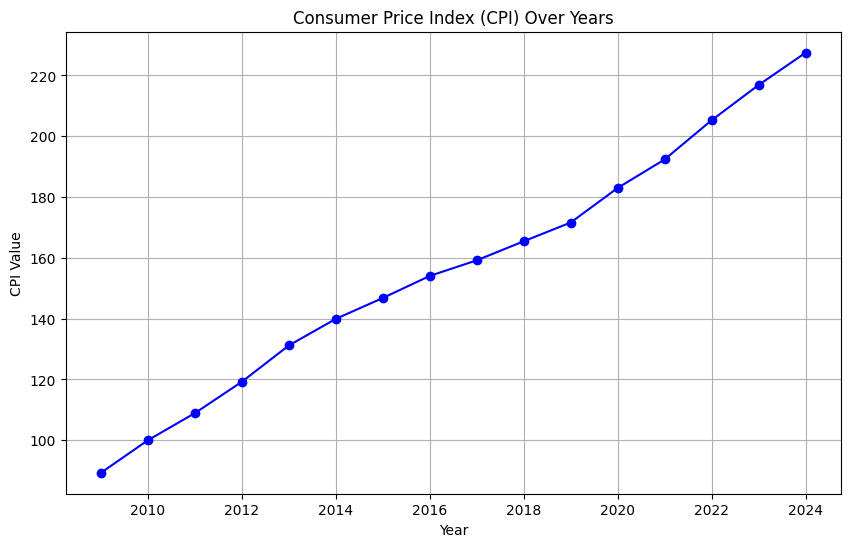

In [22]:
print(CPI)
import matplotlib.pyplot as plt

years = list(CPI.keys())
cpi_values = list(CPI.values())

plt.figure(figsize=(10, 6))
plt.plot(years, cpi_values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('CPI Value')
plt.title('Consumer Price Index (CPI) Over Years')
plt.grid(True)
plt.show()

## Adjusting for CPI

In [23]:
df_cpi_adj = {}
for regime in df:
    df_cpi_adj[regime] = df[regime]
print(df)
print('-'*100)
for regime in df:
    for i, df_stock in enumerate(df[regime]):
        df_stock['AdjCloseCPI'] = df_stock['Adj Close'].values
        df_stock['OpenCPI'] = df_stock['Open'].values
        index = df_stock.index
        
        tmpOpen = df_stock['Open'].values
        tmpAdjClose = df_stock['Adj Close'].values
        for j, date in enumerate(index):
            year = date.year
            if year in CPI:
                CPI_value = CPI[year]
                tmpOpen[j] /= CPI_value / 100
                tmpAdjClose[j] /= CPI_value / 100
        df_stock['OpenCPI'] = tmpOpen
        df_stock['AdjCloseCPI'] = tmpAdjClose
        df_cpi_adj[regime][i] = df_stock

df_cpi_adj

{'UPAII': [Price                        Adj Close        Close         High          Low  \
Ticker                           ^NSEI        ^NSEI        ^NSEI        ^NSEI   
Date                                                                            
2009-05-25 00:00:00+00:00  4237.549805  4237.549805  4270.049805  4205.100098   
2009-05-26 00:00:00+00:00  4116.700195  4116.700195  4256.049805  4092.250000   
2009-05-27 00:00:00+00:00  4276.049805  4276.049805  4286.450195  4115.250000   
2009-05-28 00:00:00+00:00  4337.100098  4337.100098  4354.850098  4254.850098   
2009-05-29 00:00:00+00:00  4448.950195  4448.950195  4488.049805  4340.750000   
...                                ...          ...          ...          ...   
2014-05-12 00:00:00+00:00  7014.250000  7014.250000  7020.049805  6862.899902   
2014-05-13 00:00:00+00:00  7108.750000  7108.750000  7172.350098  7067.149902   
2014-05-14 00:00:00+00:00  7108.750000  7108.750000  7142.250000  7080.899902   
2014-05-15 00:00:

{'UPAII': [Price                        Adj Close        Close         High          Low  \
  Ticker                           ^NSEI        ^NSEI        ^NSEI        ^NSEI   
  Date                                                                            
  2009-05-25 00:00:00+00:00  4237.549805  4237.549805  4270.049805  4205.100098   
  2009-05-26 00:00:00+00:00  4116.700195  4116.700195  4256.049805  4092.250000   
  2009-05-27 00:00:00+00:00  4276.049805  4276.049805  4286.450195  4115.250000   
  2009-05-28 00:00:00+00:00  4337.100098  4337.100098  4354.850098  4254.850098   
  2009-05-29 00:00:00+00:00  4448.950195  4448.950195  4488.049805  4340.750000   
  ...                                ...          ...          ...          ...   
  2014-05-12 00:00:00+00:00  7014.250000  7014.250000  7020.049805  6862.899902   
  2014-05-13 00:00:00+00:00  7108.750000  7108.750000  7172.350098  7067.149902   
  2014-05-14 00:00:00+00:00  7108.750000  7108.750000  7142.250000  7080.89990

## Obtain price deltas


In [24]:
deltas = {}
for regime in ["UPAII", "BJPI", "BJPII"]:
    deltas[regime] = [df[regime][n].Open.diff().dropna() for n in range(2)]

deltas_cpi = {}
for regime in ["UPAII", "BJPI", "BJPII"]:
    deltas_cpi[regime] = [df_cpi_adj[regime][n].OpenCPI.diff().dropna() for n in range(2)]

print(deltas_cpi)

{'UPAII': [Date
2009-05-26 00:00:00+00:00      1.623518
2009-05-27 00:00:00+00:00   -136.907029
2009-05-28 00:00:00+00:00    177.895255
2009-05-29 00:00:00+00:00     72.345255
2009-06-01 00:00:00+00:00    122.796257
                                ...    
2014-05-12 00:00:00+00:00    149.544991
2014-05-13 00:00:00+00:00    154.797895
2014-05-14 00:00:00+00:00     22.869485
2014-05-15 00:00:00+00:00     -0.500410
2014-05-16 00:00:00+00:00    113.561565
Name: OpenCPI, Length: 1220, dtype: float64, Date
2009-05-26 00:00:00+00:00    41.436074
2009-05-27 00:00:00+00:00   -77.328728
2009-05-28 00:00:00+00:00    66.241751
2009-05-29 00:00:00+00:00    23.741696
2009-06-01 00:00:00+00:00    70.721464
                               ...    
2014-05-12 00:00:00+00:00    52.599885
2014-05-13 00:00:00+00:00    36.198037
2014-05-14 00:00:00+00:00    43.344925
2014-05-15 00:00:00+00:00    46.310567
2014-05-16 00:00:00+00:00    31.659978
Name: OpenCPI, Length: 1221, dtype: float64], 'BJPI': [Date
2014-

## Generate Graphs of the Average and Volatility of the deltas

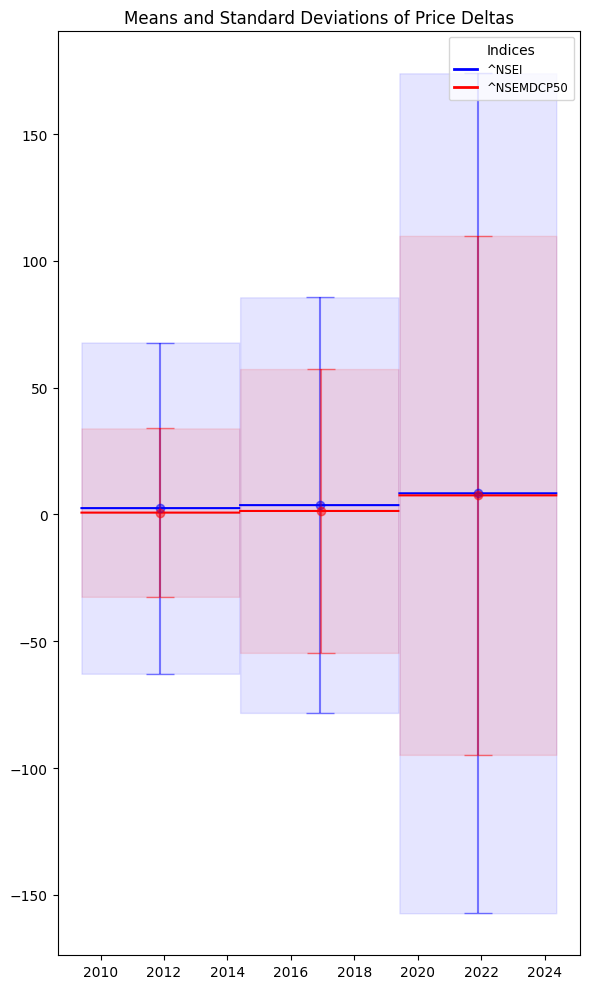

In [25]:
# for regime in deltas:
#     for i, index in enumerate(Index):
#         print(f"Regime: {regime}, Index: {index}")
#         print(deltas[regime][i].values)
# Define colors for the indices
colors = {'^NSEI': 'blue', '^NSEMDCP50': 'red'}

# Plotting the means and standard deviations in a single graph
plt.figure(figsize=(6, 10))

for regime in deltas:
    for i, index in enumerate(Index):
        means = deltas[regime][i].mean().values[0]
        std_devs = deltas[regime][i].std().values[0]
        mid_point = len(deltas[regime][i]) // 2
        
        plt.plot(deltas[regime][i].index, [means] * len(deltas[regime][i]), color=colors[index])
        plt.errorbar(deltas[regime][i].index[mid_point], means, yerr=std_devs, fmt='o', alpha=0.5, capsize=10, color=colors[index])
        plt.fill_between(deltas[regime][i].index, means - std_devs, means + std_devs, color=colors[index], alpha=0.1)

# Custom legend
handles = [plt.Line2D([0], [0], color=color, lw=2) for color in colors.values()]
labels = [index for index in colors.keys()]
plt.legend(handles, labels, title="Indices", fontsize="small", markerscale=0.5, borderpad=0.5, loc="upper right")

plt.title("Means and Standard Deviations of Price Deltas")
plt.tight_layout()
plt.show()

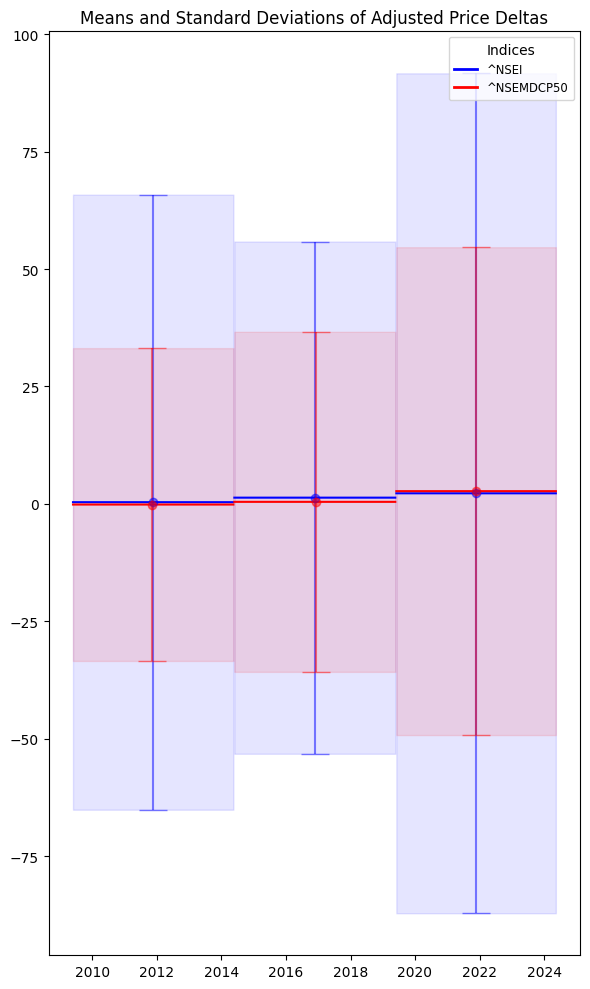

In [26]:
import matplotlib.pyplot as plt

# Define colors for the indices
colors = {'^NSEI': 'blue', '^NSEMDCP50': 'red'}

# Plotting the means and standard deviations in a single graph
plt.figure(figsize=(6, 10))

for regime in deltas_cpi:
    for i, index in enumerate(Index):
        means = deltas_cpi[regime][i].mean()
        std_devs = deltas_cpi[regime][i].std()
        mid_point = len(deltas_cpi[regime][i]) // 2
        
        plt.plot(deltas_cpi[regime][i].index, [means] * len(deltas_cpi[regime][i]), color=colors[index])
        plt.errorbar(deltas_cpi[regime][i].index[mid_point], means, yerr=std_devs, fmt='o', alpha=0.5, capsize=10, color=colors[index])
        plt.fill_between(deltas_cpi[regime][i].index, means - std_devs, means + std_devs, color=colors[index], alpha=0.1)

# Custom legend
handles = [plt.Line2D([0], [0], color=color, lw=2) for color in colors.values()]
labels = [index for index in colors.keys()]
plt.legend(handles, labels, title="Indices", fontsize="small", markerscale=0.5, borderpad=0.5, loc="upper right")

plt.title("Means and Standard Deviations of Adjusted Price Deltas")
plt.tight_layout()
plt.show()

## Average and Volatility graphs conditioned on the year you are in

/Users/quirtt/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


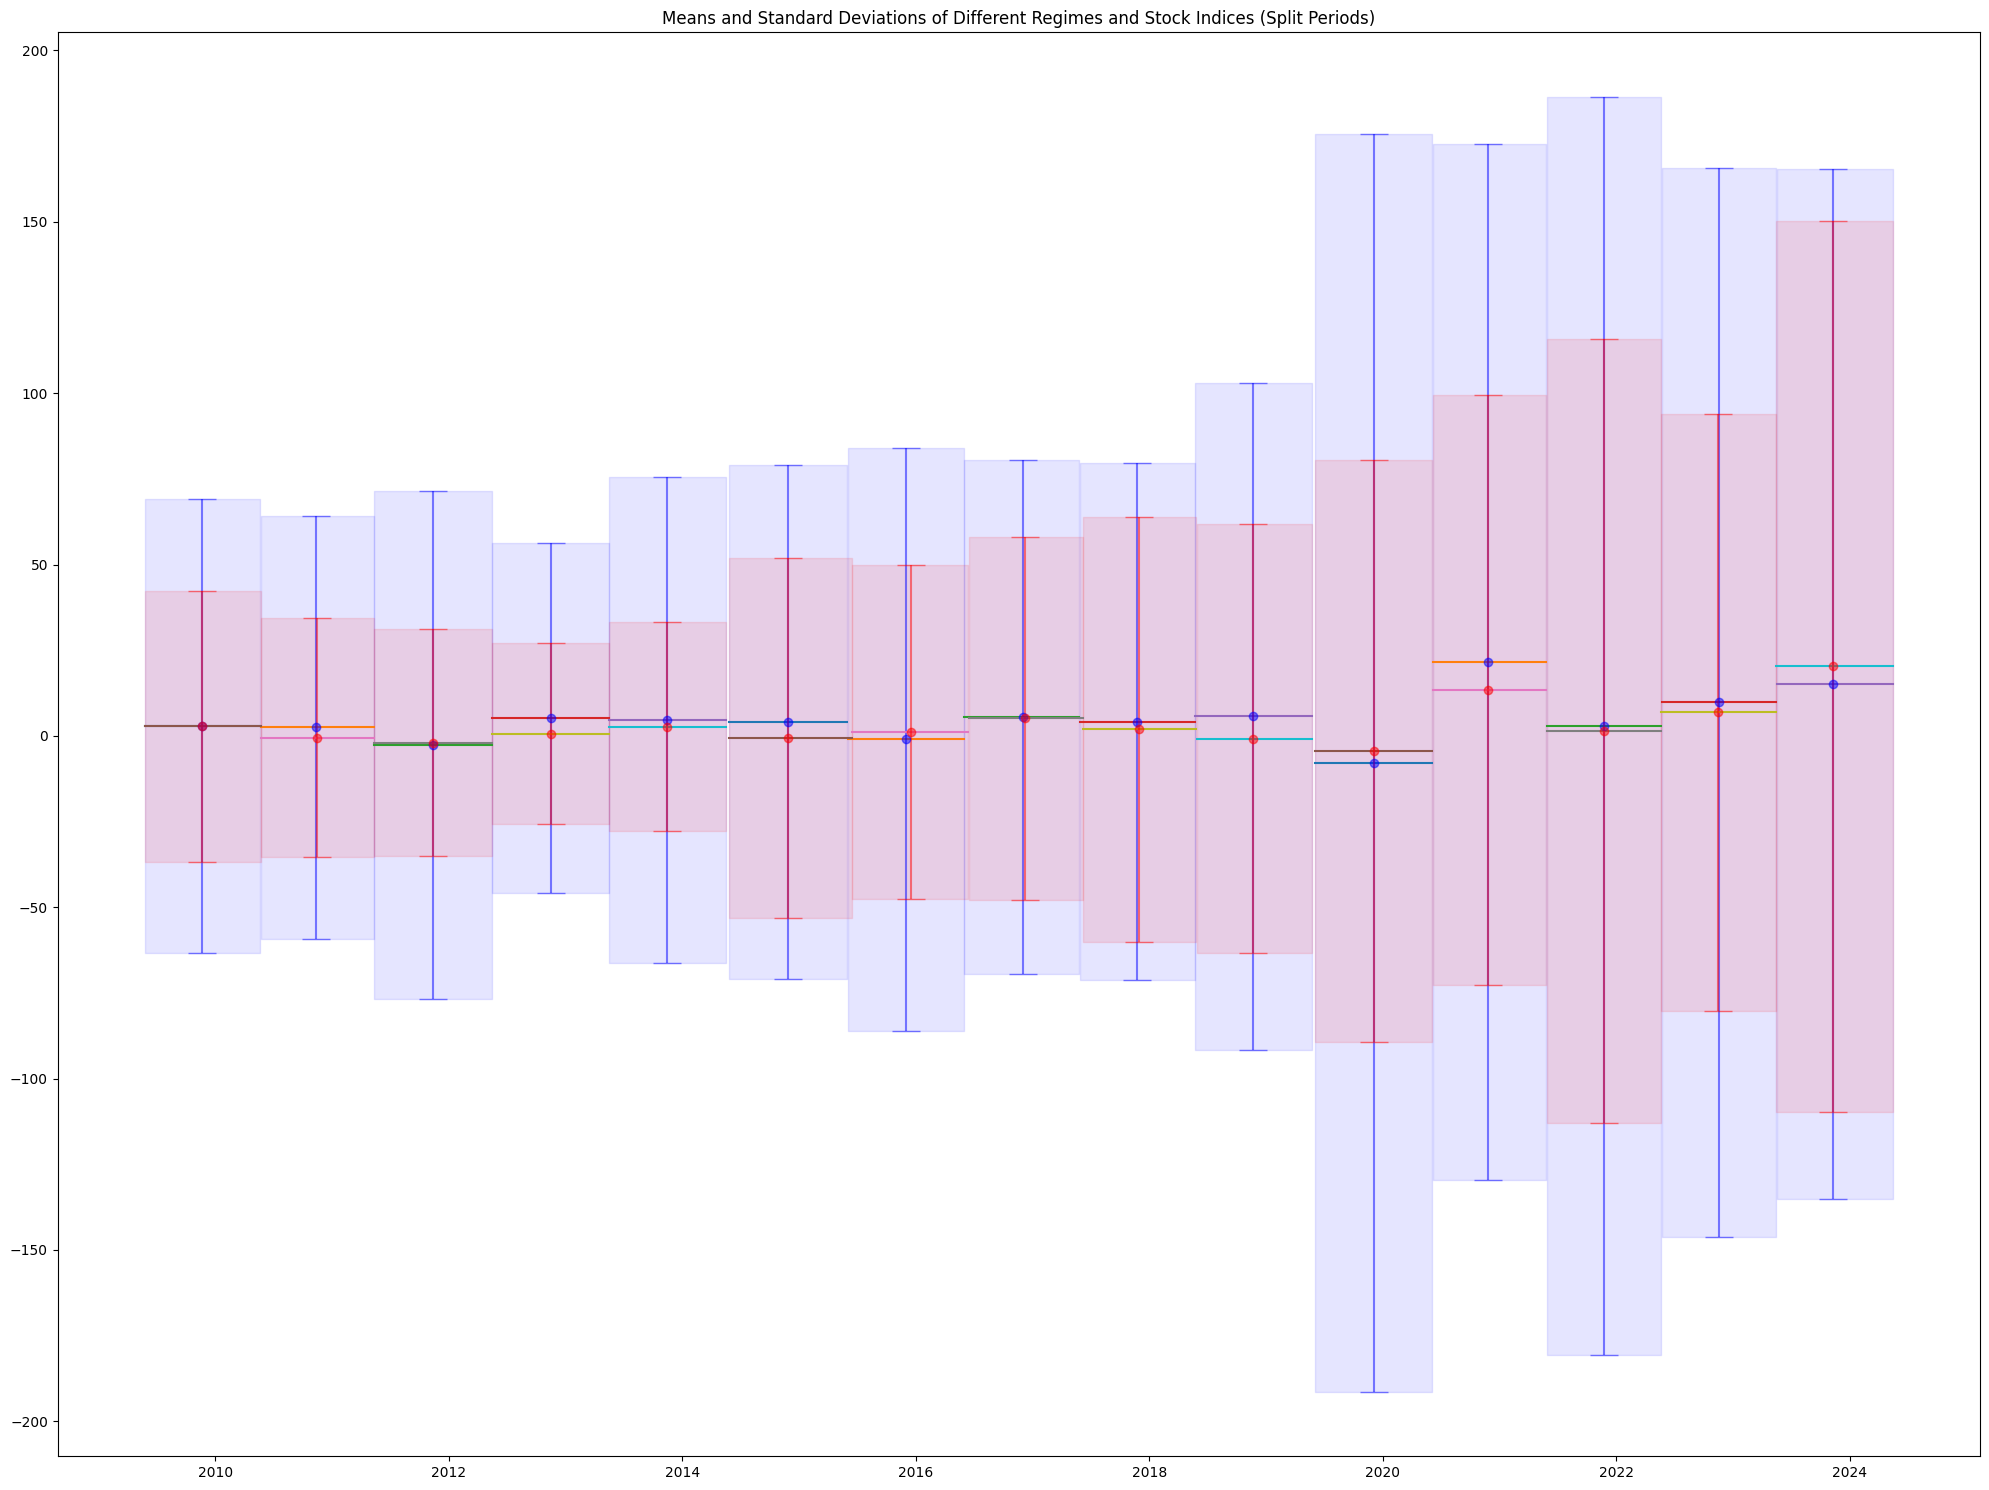

In [27]:
import matplotlib.pyplot as plt
# Splitting the regime periods into 5 parts
split_deltas = {}
for regime in deltas:
    split_deltas[regime] = []
    for i, index in enumerate(Index):
        split_size = len(deltas[regime][i]) // 5
        split_deltas[regime].append(np.array_split(deltas[regime][i], 5))

# Calculating means and standard deviations for each split period
split_means = {}
split_std_devs = {}
for regime in split_deltas:
    split_means[regime] = []
    split_std_devs[regime] = []
    for i, index in enumerate(Index):
        split_means[regime].append([part.mean() for part in split_deltas[regime][i]])
        split_std_devs[regime].append([part.std() for part in split_deltas[regime][i]])

# Plotting the means and standard deviations for each split period
plt.figure(figsize=(20, 15))

for regime in split_means:
    for i, index in enumerate(Index):
        for j in range(5):
            means = split_means[regime][i][j].values[0]
            std_devs = split_std_devs[regime][i][j].values[0]
            mid_point = len(split_deltas[regime][i][j]) // 2
            
            plt.plot(split_deltas[regime][i][j].index, [means] * len(split_deltas[regime][i][j]), label=f'{regime} - {index} Mean (Part {j+1})')
            color = 'blue' if index == '^NSEI' else 'red'
            plt.errorbar(split_deltas[regime][i][j].index[mid_point], means, yerr=std_devs, fmt='o', alpha=0.5, label=f'{regime} - {index} Std Dev (Part {j+1})', capsize=10, color=color)
            plt.fill_between(split_deltas[regime][i][j].index, means - std_devs, means + std_devs, color=color, alpha=0.1)

plt.title("Means and Standard Deviations of Different Regimes and Stock Indices (Split Periods)")
# plt.legend()
plt.tight_layout()
plt.show()


/Users/quirtt/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


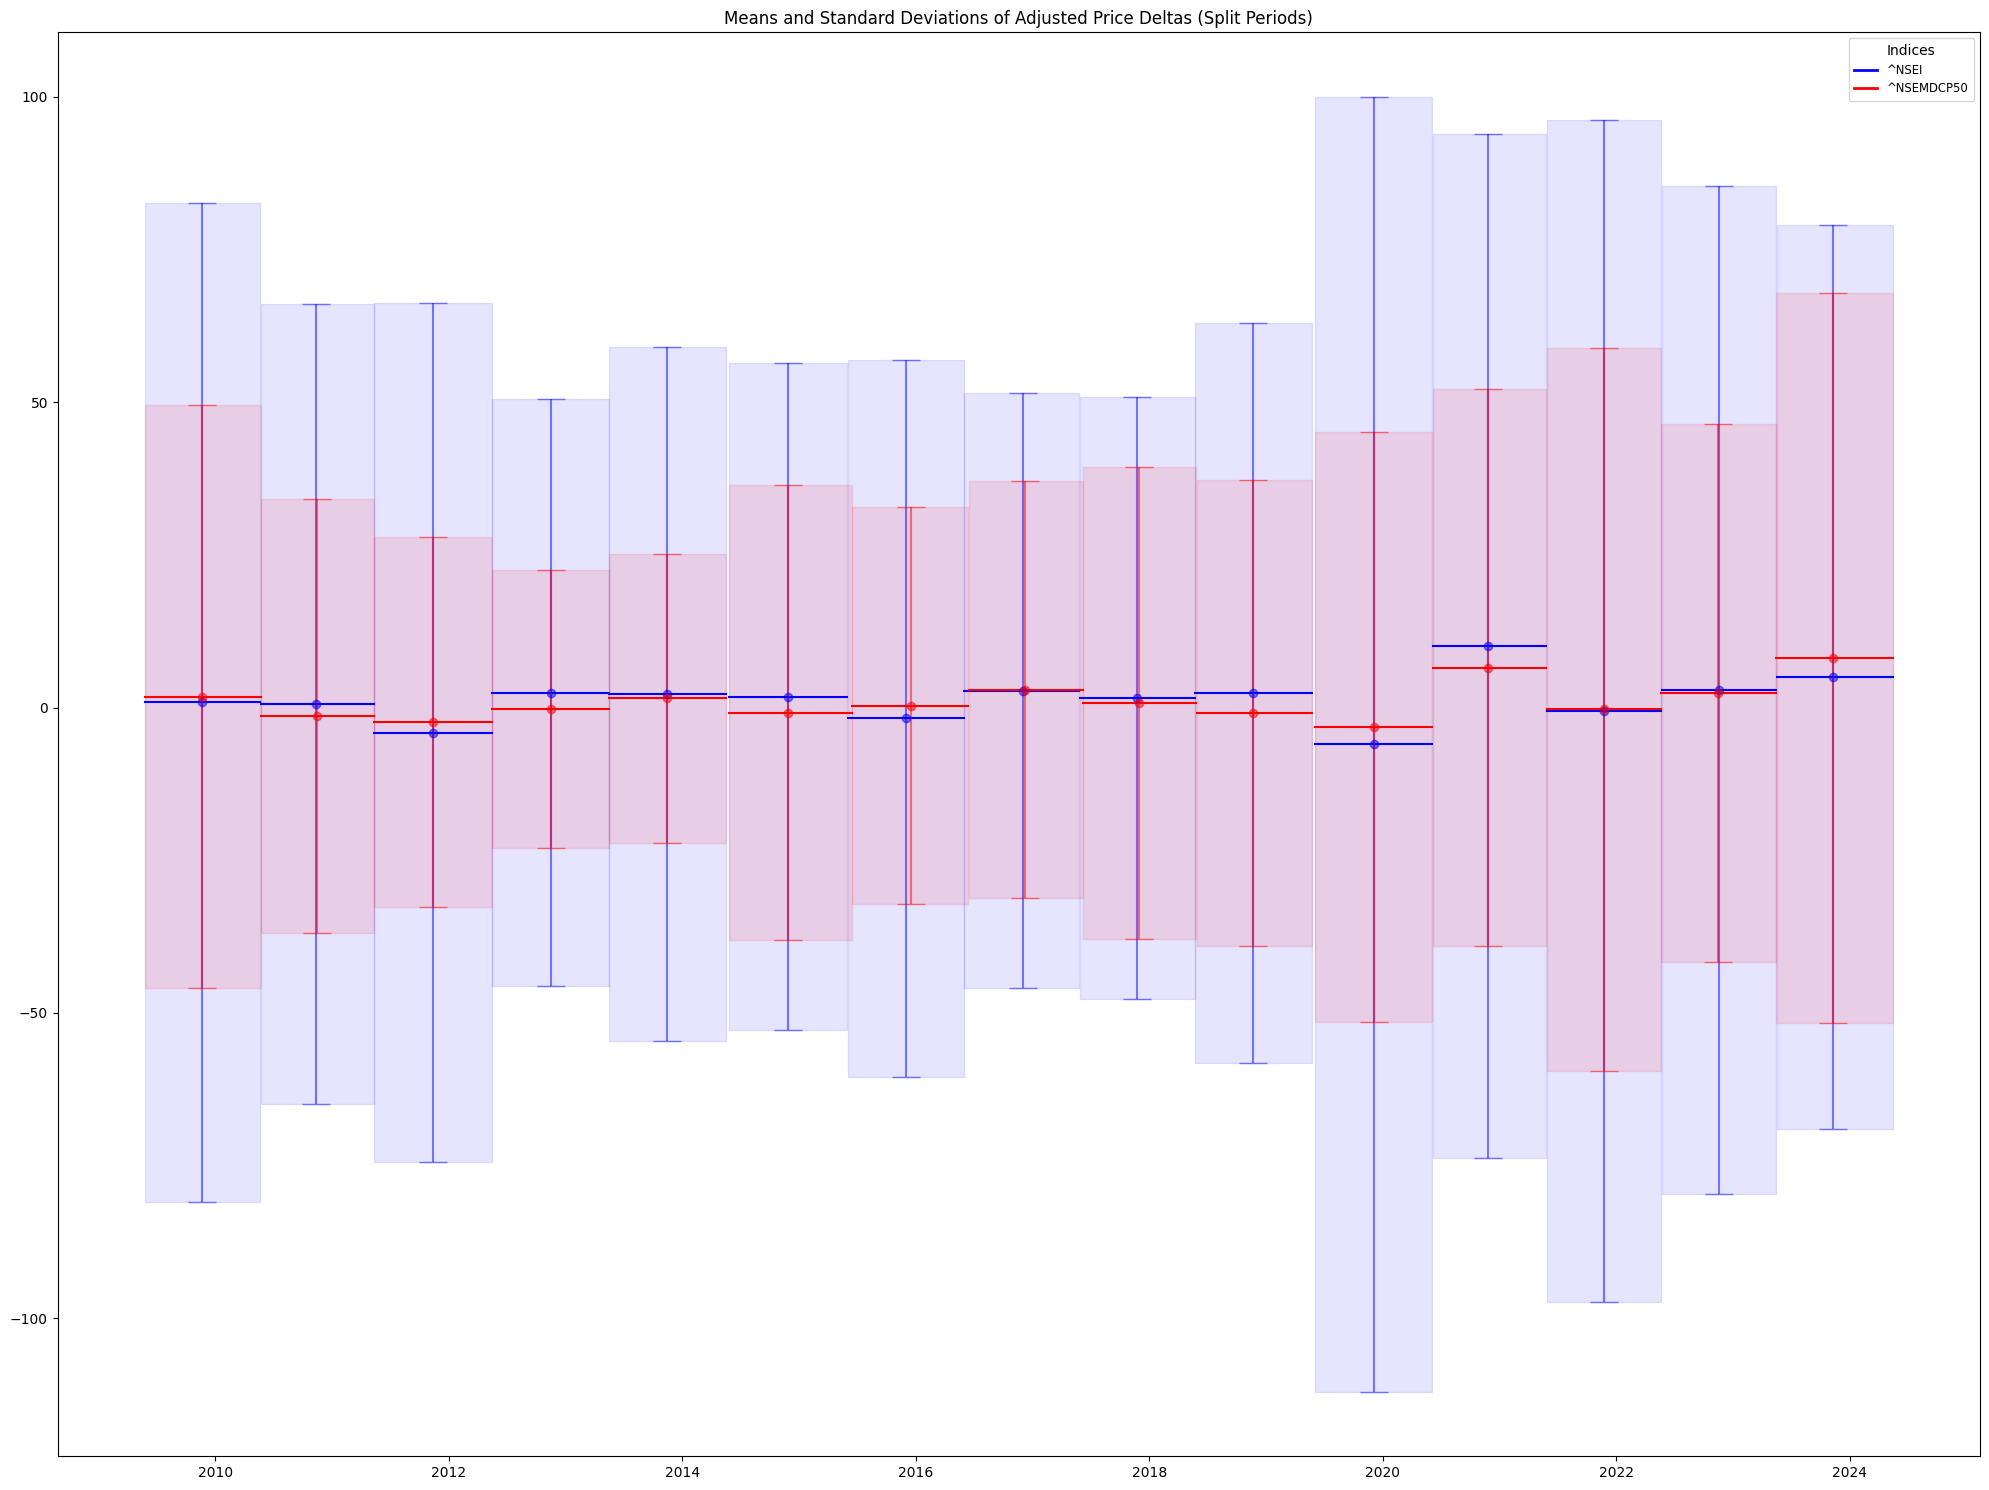

In [28]:
import matplotlib.pyplot as plt
# Splitting the regime periods into 5 parts
split_deltas_cpi = {}
for regime in deltas_cpi:
    split_deltas_cpi[regime] = []
    for i, index in enumerate(Index):
        split_size = len(deltas_cpi[regime][i]) // 5
        split_deltas_cpi[regime].append(np.array_split(deltas_cpi[regime][i], 5))

# Calculating means and standard deviations for each split period
split_means = {}
split_std_devs = {}
for regime in split_deltas_cpi:
    split_means[regime] = []
    split_std_devs[regime] = []
    for i, index in enumerate(Index):
        split_means[regime].append([part.mean() for part in split_deltas_cpi[regime][i]])
        split_std_devs[regime].append([part.std() for part in split_deltas_cpi[regime][i]])

# Plotting the means and standard deviations for each split period
plt.figure(figsize=(20, 15))

for regime in split_means:
    for i, index in enumerate(Index):
        for j in range(5):
            means = split_means[regime][i][j]
            std_devs = split_std_devs[regime][i][j]
            mid_point = len(split_deltas_cpi[regime][i][j]) // 2
            
            color = colors[index]
            plt.plot(split_deltas_cpi[regime][i][j].index, [means] * len(split_deltas_cpi[regime][i][j]), label=f'{regime} - {index} Mean (Part {j+1})', color=color)
            plt.errorbar(split_deltas_cpi[regime][i][j].index[mid_point], means, yerr=std_devs, fmt='o', alpha=0.5, label=f'{regime} - {index} Std Dev (Part {j+1})', capsize=10, color=color)
            plt.fill_between(split_deltas_cpi[regime][i][j].index, means - std_devs, means + std_devs, color=color, alpha=0.1)

# Custom legend
handles = [plt.Line2D([0], [0], color=color, lw=2) for color in colors.values()]
labels = [index for index in colors.keys()]
plt.legend(handles, labels, title="Indices", fontsize="small", markerscale=0.5, borderpad=0.5, loc="upper right")

plt.title("Means and Standard Deviations of Adjusted Price Deltas (Split Periods)")
plt.tight_layout()
plt.show()


## Grouping the deltas in buckets of n days and performing (Average/Sum)

In [29]:
## Groupby into n days: Average delta in a group of n days
## TODO: Figure out which of .sum() or .mean() makes more sense.

group_size= 5  # You can adjust this value as needed

deltas_grouped = {}
for regime in deltas:
    deltas_grouped[regime] = {}
    for i, index in enumerate(Index):
        deltas_grouped[regime][index] = deltas[regime][i].groupby(np.arange(len(deltas[regime][i])) // group_size).mean() #.sum()

print(deltas_grouped)

{'UPAII': {'^NSEI': Ticker       ^NSEI
0        42.459961
1        26.390039
2         0.459961
3       -54.089941
4        12.239941
..             ...
239      10.170020
240       6.109961
241     -22.659961
242     -11.160059
243     123.210059

[244 rows x 1 columns], '^NSEMDCP50': Ticker  ^NSEMDCP50
0        22.290015
1        32.279980
2       -17.210010
3       -15.379980
4        14.979980
..             ...
240       7.469971
241      -4.550000
242      -8.839990
243      44.239990
244      44.300049

[245 rows x 1 columns]}, 'BJPI': {'^NSEI': Ticker       ^NSEI
0       -32.940039
1        71.520020
2       -17.370020
3        -4.159961
4         4.009961
..             ...
239       0.020117
240      22.519922
241     -80.629883
242     -28.410156
243     144.190039

[244 rows x 1 columns], '^NSEMDCP50': Ticker  ^NSEMDCP50
0       -34.169971
1        68.229980
2       -39.210010
3        -1.329980
4        19.060010
..             ...
235     -21.110059
236     -17.269922
237

In [30]:
## Groupby into n days: Average delta in a group of n days
## TODO: Figure out which of .sum() or .mean() makes more sense.

group_size= 5  # You can adjust this value as needed

deltas_cpi_grouped = {}
for regime in deltas_cpi:
    deltas_cpi_grouped[regime] = {}
    for i, index in enumerate(Index):
        deltas_cpi_grouped[regime][index] = deltas_cpi[regime][i].groupby(np.arange(len(deltas_cpi[regime][i])) // group_size).mean() #.sum()

print(deltas_cpi_grouped)

{'UPAII': {'^NSEI': 0      47.550651
1      29.554044
2       0.515107
3     -60.574995
4      13.707436
         ...    
239     7.268222
240     4.366614
241   -16.194426
242    -7.975775
243    88.054705
Name: OpenCPI, Length: 244, dtype: float64, '^NSEMDCP50': 0      24.962451
1      36.150153
2     -19.273385
3     -17.223946
4      16.775989
         ...    
240     5.338574
241    -3.251755
242    -6.317688
243    31.617056
244    31.659978
Name: OpenCPI, Length: 245, dtype: float64}, 'BJPI': {'^NSEI': 0     -23.541304
1      51.113313
2     -12.413856
3      -2.973005
4       2.865804
         ...    
239     0.011722
240    13.121848
241   -46.981204
242   -16.553954
243    84.016266
Name: OpenCPI, Length: 244, dtype: float64, '^NSEMDCP50': 0     -24.420301
1      48.762016
2     -28.022273
3      -0.950499
4      13.621644
         ...    
235   -12.300352
236   -10.062792
237   -18.383469
238   -10.540655
239    31.656847
Name: OpenCPI, Length: 240, dtype: float64}, 'BJPII':

## Statistical Analysis: Paired t-test

In [31]:
NSEI = {}
for regime in deltas:
    NSEI[regime] = deltas_grouped[regime]["^NSEI"].values

X = NSEI["UPAII"]
Y = NSEI["BJPI"]
n = len(X)
assert (n == len(Y))
D=np.empty(n,)

for i,val in enumerate(zip(X,Y)):
    D[i] = int(val[1]-val[0])
print(f'D_mean: {D_mean}')
D

/var/folders/78/6m7zz8c9331c_bj4sl30xzg40000gn/T/ipykernel_7874/1920454128.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  D[i] = int(val[1]-val[0])


NameError: name 'D_mean' is not defined

0.4225407076881711


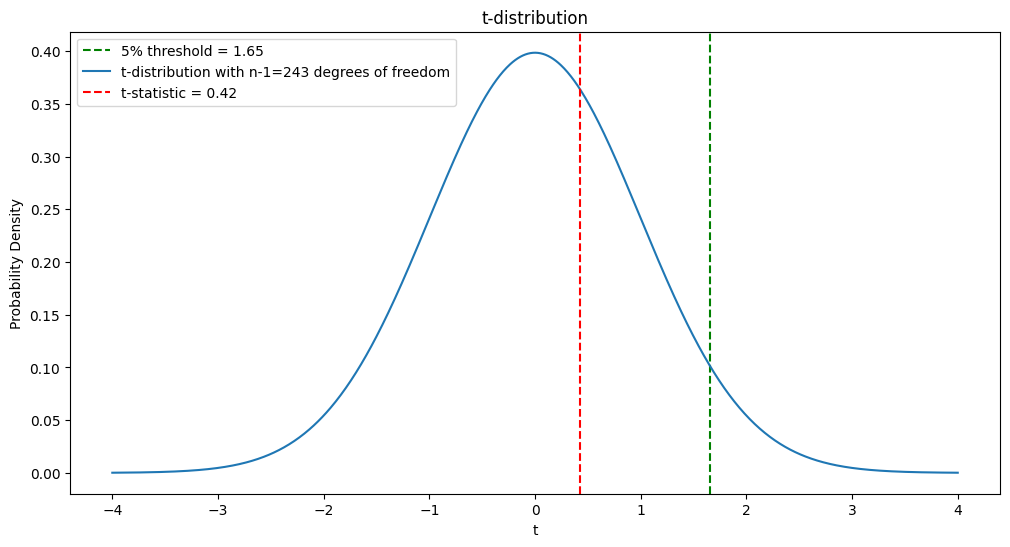

In [ ]:
from scipy.stats import t as t_dist

D_mean = D.mean()
s2 = ((D-D_mean)**2).sum()/(n-1)
t = np.sqrt(n) * D_mean / np.sqrt(s2)
print(t)
# Plotting the t-distribution
plt.figure(figsize=(12, 6))
x = np.linspace(-4, 4, 1000)
# Calculate the 5% probability threshold towards the right
threshold = t_dist.ppf(0.95, n-1)
plt.axvline(threshold, color='green', linestyle='--', label=f'5% threshold = {threshold:.2f}')
y = t_dist.pdf(x, n-1)

plt.plot(x, y, label=f't-distribution with n-1={n-1} degrees of freedom')
plt.axvline(t, color='red', linestyle='--', label=f't-statistic = {t:.2f}')
plt.title('t-distribution')
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

0.4194921126875986


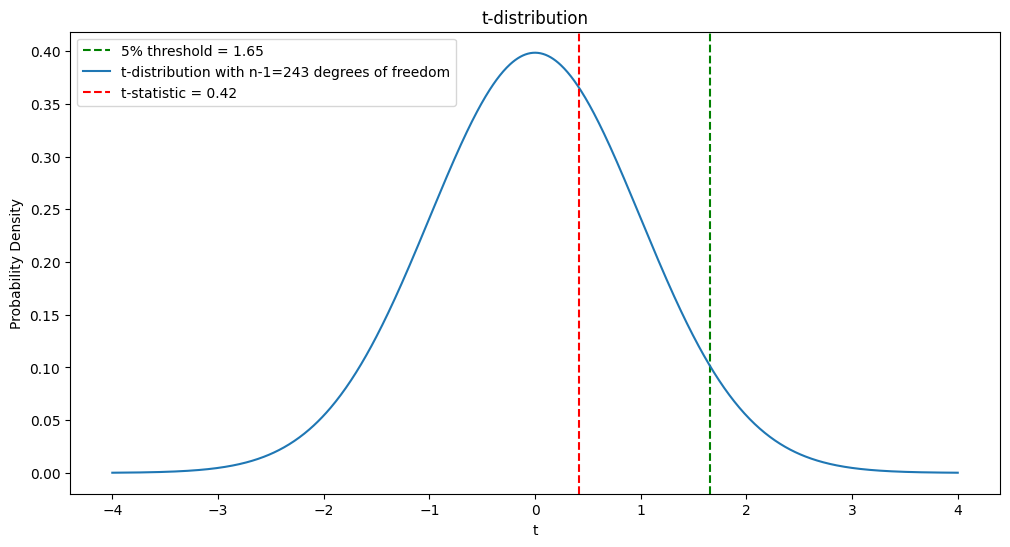

In [ ]:
NSEI = {}
for regime in deltas_cpi:
    NSEI[regime] = deltas_cpi_grouped[regime]["^NSEI"].values

X = NSEI["UPAII"]
Y = NSEI["BJPI"]
n = len(X)
assert (n == len(Y))
D=np.empty(n,)

for i,val in enumerate(zip(X,Y)):
    D[i] = int(val[1]-val[0])

from scipy.stats import t as t_dist

D_mean = D.mean()
s2 = ((D-D_mean)**2).sum()/(n-1)
t = np.sqrt(n) * D_mean / np.sqrt(s2)
print(t)
# Plotting the t-distribution
plt.figure(figsize=(12, 6))
x = np.linspace(-4, 4, 1000)

# Calculate the 5% probability threshold towards the right
threshold = t_dist.ppf(0.95, n-1)
plt.axvline(threshold, color='green', linestyle='--', label=f'5% threshold = {threshold:.2f}')
y = t_dist.pdf(x, n-1)

plt.plot(x, y, label=f't-distribution with n-1={n-1} degrees of freedom')
plt.axvline(t, color='red', linestyle='--', label=f't-statistic = {t:.2f}')
plt.title('t-distribution')
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

{'UPAII': array([ 2.49624514e+01,  3.61501532e+01, -1.92733849e+01, -1.72239463e+01,
        1.67759887e+01, -9.40699939e-01, -5.21198511e+01,  4.10776863e+01,
        2.31594386e+01,  1.33827321e+01, -1.45810404e+01,  9.51909814e+00,
        2.68774536e+00,  1.89149970e+01,  5.18514156e+00,  1.87019000e+00,
        2.46600855e+01,  1.04485882e+01,  5.39791047e+00,  2.13227689e+01,
       -1.36851253e+01, -4.55012673e+01,  3.53438624e+01,  1.43346419e+01,
       -3.57245060e+00, -4.09882261e+00,  1.24868170e+01, -3.91962865e-01,
       -1.18820852e+01,  2.54663763e+01, -4.44484983e+01,  1.00100098e+01,
       -2.99100098e+01, -2.35799805e+01, -4.42001953e+00,  7.18999023e+00,
       -5.51000977e+00,  1.29200195e+01,  1.23100098e+01,  4.48999023e+00,
        3.55000000e+00,  2.63999023e+00,  1.46899902e+01, -3.60996094e+00,
        6.60996094e+00,  9.30000000e+00, -2.33799805e+01, -9.20019531e-01,
       -1.96899902e+01,  3.37001953e+00,  2.92998047e+00,  8.67001953e+00,
        8.01000

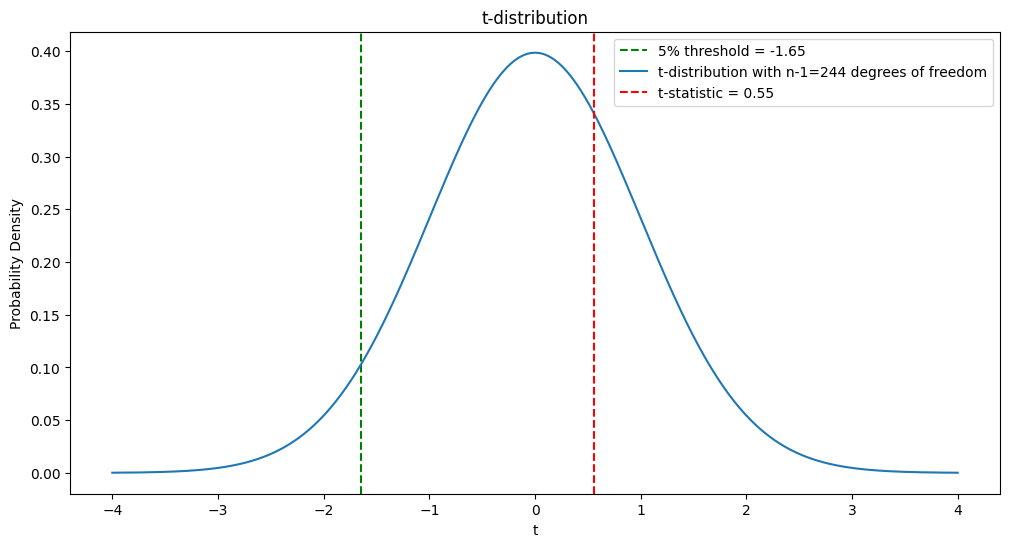

In [ ]:
NSEMDCP50 = {}
for regime in deltas_cpi:
    NSEMDCP50[regime] = deltas_cpi_grouped[regime]["^NSEMDCP50"].values
print(NSEMDCP50)
X = NSEMDCP50["UPAII"]
Y = NSEMDCP50["BJPI"]
n = len(X)
D=np.empty(n,)

for i,val in enumerate(zip(X,Y)):
    D[i] = int(val[1]-val[0])

from scipy.stats import t as t_dist

D_mean = D.mean()
s2 = ((D-D_mean)**2).sum()/(n-1)
t = np.sqrt(n) * D_mean / np.sqrt(s2)
print(t)
# Plotting the t-distribution
plt.figure(figsize=(12, 6))
x = np.linspace(-4, 4, 1000)
# Calculate the 5% probability threshold towards the left
threshold = t_dist.ppf(0.05, n-1)
plt.axvline(threshold, color='green', linestyle='--', label=f'5% threshold = {threshold:.2f}')
y = t_dist.pdf(x, n-1)

plt.plot(x, y, label=f't-distribution with n-1={n-1} degrees of freedom')
plt.axvline(t, color='red', linestyle='--', label=f't-statistic = {t:.2f}')
plt.title('t-distribution')
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

### Question 2

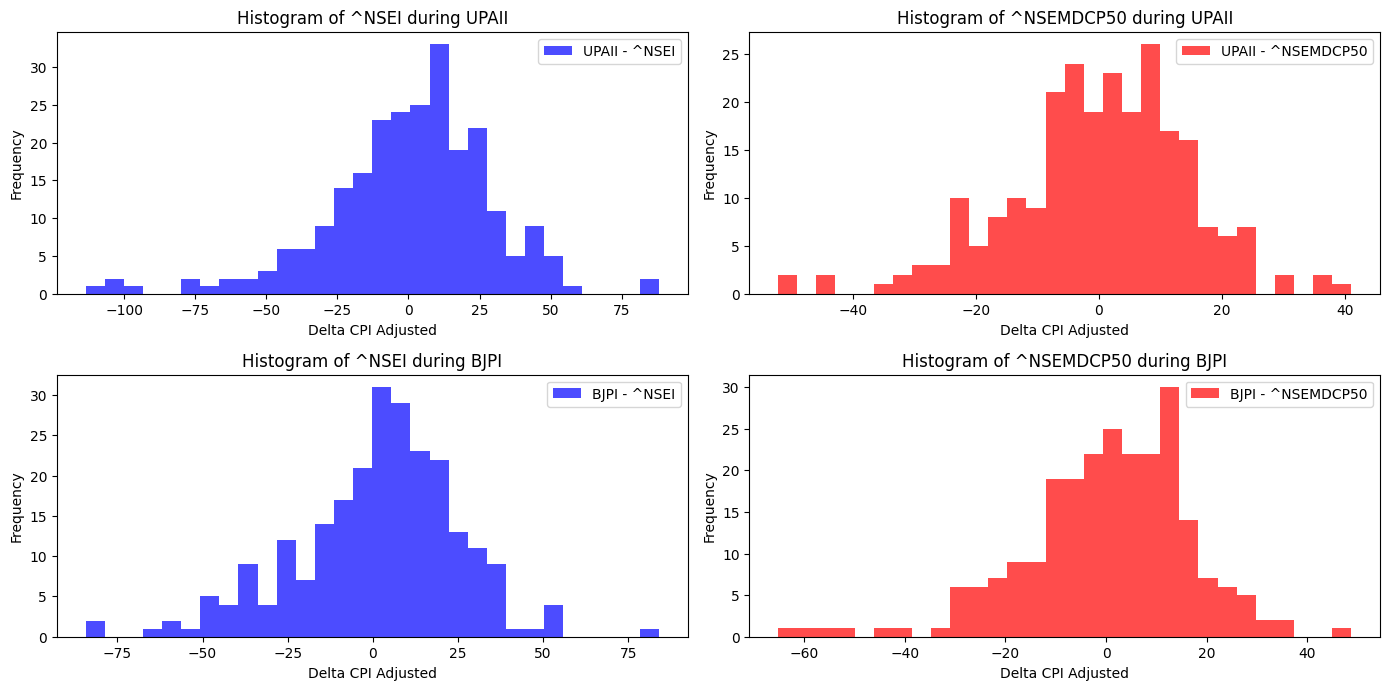

In [ ]:
import matplotlib.pyplot as plt

# Plotting histograms for each regime and index
plt.figure(figsize=(14, 10))

for regime in deltas_cpi_grouped:
    if regime != "BJPII":
        for i, index in enumerate(Index):
            plt.subplot(len(deltas_cpi_grouped), len(Index), i + 1 + len(Index) * list(deltas_cpi_grouped.keys()).index(regime))
            plt.hist(deltas_cpi_grouped[regime][index], bins=30, alpha=0.7, label=f'{regime} - {index}', color=colors[index])
            plt.xlabel('Delta CPI Adjusted')
            plt.ylabel('Frequency')
            plt.title(f'Histogram of {index} during {regime}')
            plt.legend()

plt.tight_layout()
plt.show()

244 244


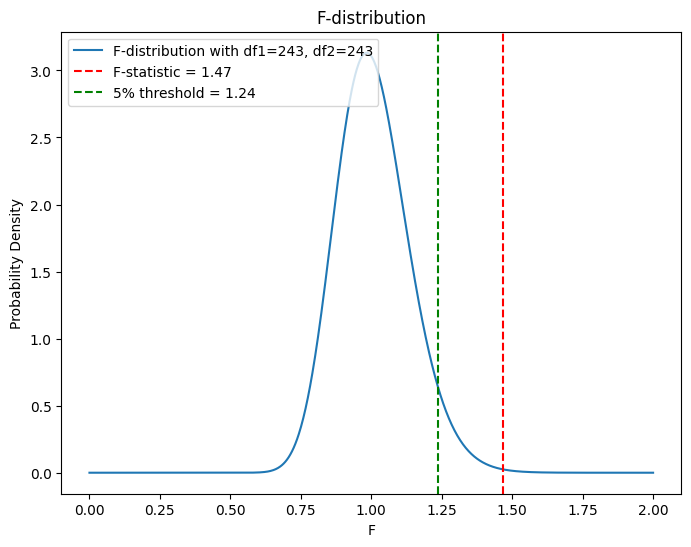

In [ ]:
from scipy.stats import f as f_dist

NSEI = {}
for regime in deltas_cpi_grouped:
    NSEI[regime] = deltas_cpi_grouped[regime]["^NSEI"].values
n = len(NSEI["UPAII"])

X = NSEI["UPAII"]
Y = NSEI["BJPI"]

S1_sq = 1/(n-1) * ((X - X.mean())**2).sum()
S2_sq = 1/(n-1) * ((Y - Y.mean())**2).sum()
F = S1_sq/S2_sq
# Calculate the 5% probability threshold for the F-distribution
f_threshold = f_dist.ppf(0.95, n-1, n-1)

# Plotting the F-distribution
plt.figure(figsize=(8, 6))
x = np.linspace(0, 2, 1000)
y = f_dist.pdf(x, n-1, n-1)

plt.plot(x, y, label=f'F-distribution with df1={n-1}, df2={n-1}')
plt.axvline(F, color='red', linestyle='--', label=f'F-statistic = {F:.2f}')
plt.axvline(f_threshold, color='green', linestyle='--', label=f'5% threshold = {f_threshold:.2f}')
plt.title('F-distribution')
plt.xlabel('F')
plt.ylabel('Probability Density')
plt.legend(loc="upper left")
plt.show()

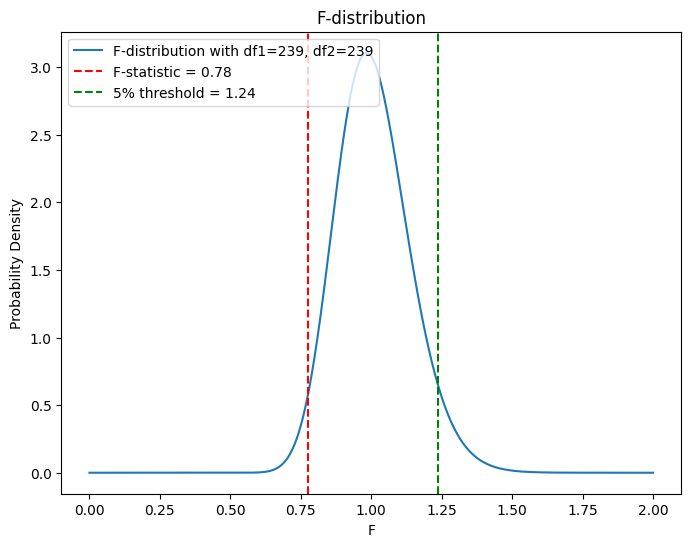

In [51]:
from scipy.stats import f as f_dist

NSEMDCP50 = {}
for regime in deltas_cpi_grouped:
    NSEMDCP50[regime] = deltas_cpi_grouped[regime]["^NSEMDCP50"].values
n = len(NSEMDCP50["BJPI"])

X = NSEMDCP50["UPAII"][:n]
Y = NSEMDCP50["BJPI"]


S1_sq = 1/(n-1) * ((X - X.mean())**2).sum()
S2_sq = 1/(n-1) * ((Y - Y.mean())**2).sum()
F = S1_sq/S2_sq
# Calculate the 5% probability threshold for the F-distribution
f_threshold = f_dist.ppf(0.95, n-1, n-1)

# Plotting the F-distribution
plt.figure(figsize=(8, 6))
x = np.linspace(0, 2, 1000)
y = f_dist.pdf(x, n-1, n-1)

plt.plot(x, y, label=f'F-distribution with df1={n-1}, df2={n-1}')
plt.axvline(F, color='red', linestyle='--', label=f'F-statistic = {F:.2f}')
plt.axvline(f_threshold, color='green', linestyle='--', label=f'5% threshold = {f_threshold:.2f}')
plt.title('F-distribution')
plt.xlabel('F')
plt.ylabel('Probability Density')
plt.legend(loc="upper left")
plt.show()